## Problem Statement
Boston Housing - Prices of house properties are given along with their characteristics -
1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. INDUS: Proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - Nitric oxides concentration (parts per 10 million)
6. RM - Average number of rooms per dwelling
7. AGE - Proportion of owner-occupied units built prior to 1940
8. DIS - Weighted distances to five Boston employment centres
9. RAD - Index of accessibility to radial highways
10. TAX - Full-value property-tax rate per 10,000 dollars
11. PTRATIO - Pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

## Goal
1. Analysis of the data - understanding the characteristics of the properties
2. Prediction - predicting prices of new house properties based on their characteristics

## Description


*   Features: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
*   Target: MEDV



In [370]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import random
import copy

In [371]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
          'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", delim_whitespace=True, names = columns)
df.head(10)

/tmp/ipython-input-810203818.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, names = columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [372]:
target = 'MEDV'
features = [x for x in columns if x != target]

In [373]:
# Basic statistics
print(f"Data Summary: \n{df.describe()}\n")
print(f"Data Shape: \n{df.shape}")

Data Summary: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.1

Comment - TAX and B have high variations (168 and 91)

### Validating Assumptions of Linear Regression

In [374]:
X = df.loc[:, features]
y = df[target]

print(X.shape)
print(y.shape)

(506, 13)
(506,)


1. Linearity of data

Text(0.5, 1.0, 'Residual plot')

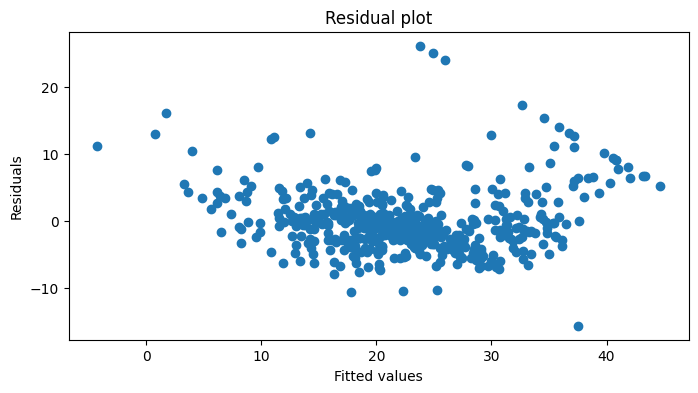

In [375]:
# 1. Linearity of data
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)
residuals = y - y_pred

plt.figure(figsize = (8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')

Comment: There is no clear pattern in the residuals

2. Non-correlation of Error Terms: Since there is no clear pattern in residual plot, we can assume there is no correlation in the error terms

3. Constant variance of Error Terms (Homoscedasticity): Since there is no clear pattern in residual plot, we can assume variance of error terms is constant

4. Outliers

Text(0.5, 1.0, 'Studentized Residual plot')

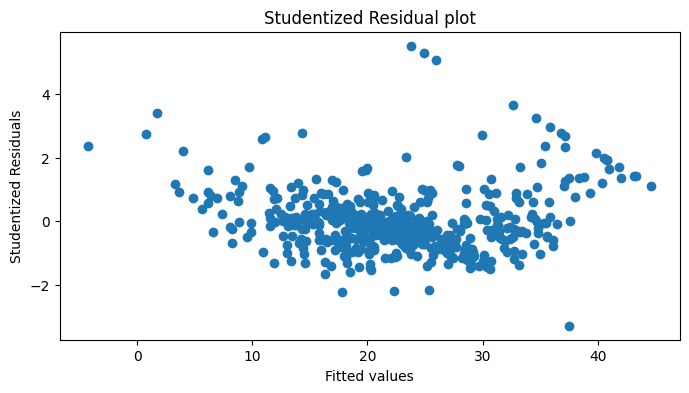

In [376]:
# 4. Outliers
sse = 0
for x in residuals:
  sse += (x ** 2)
degrees_of_freedom = X.shape[0] - (X.shape[1] + 1)
mse = sse / degrees_of_freedom
rmse = np.sqrt(mse)
studentized_residuals = []
for x in residuals:
  studentized_residuals.append(x / rmse)

plt.figure(figsize = (8, 4))
plt.scatter(y_pred, studentized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residual plot')

In [377]:
# get indices of possible outliers
for i in range(len(studentized_residuals)):
  if(studentized_residuals[i] > 3 or studentized_residuals[i] < -3):
    print(f"Studentized Residual: {studentized_residuals[i]}, Index: {i}")

Studentized Residual: -3.2863001022434313, Index: 364
Studentized Residual: 5.52110109306654, Index: 368
Studentized Residual: 3.657499641578665, Index: 369
Studentized Residual: 3.2438761456334784, Index: 370
Studentized Residual: 5.2803186892422405, Index: 371
Studentized Residual: 5.057678143772176, Index: 372
Studentized Residual: 3.410003188964325, Index: 412


Indices of high leverage: [155 365 367 380 405 410 418 490 492]


Text(0.5, 1.0, 'Leverage vs Studentized Residual plot')

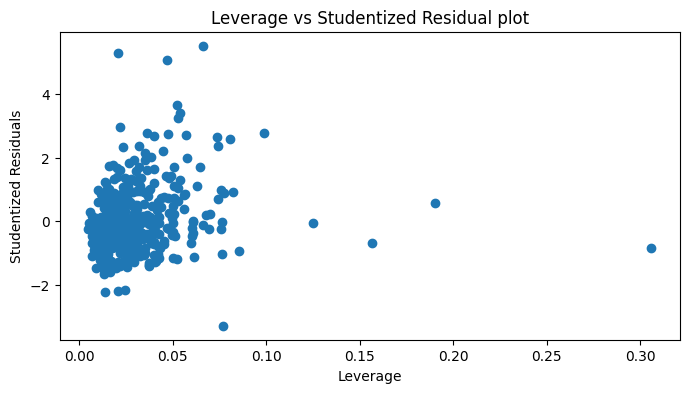

In [378]:
# 5. High Leverage Points
leverage = model.get_influence().hat_matrix_diag
p = X.shape[1]
n = X.shape[0]
threshold = 3 * (p / n)
high_leverage = np.where(leverage > threshold)[0]
print(f"Indices of high leverage: {high_leverage}")

plt.figure(figsize = (8, 4))
plt.scatter(leverage, studentized_residuals)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Leverage vs Studentized Residual plot')

In [379]:
outliers_and_leverage_points = [368, 371, 372, 380]
df.iloc[outliers_and_leverage_points, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
371,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0
380,88.97620,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4


Comment: For data 368, 371, and 372, 'MEDV'=50.0, which is upper bound of price, this is not an issue.  
However, data 380 has 'CRIM'=88.97 which is unusually high, since 'CRIM' has min_value=0.00, 75%-th percentile=3.67, and max_value=88.97.  
Decision: We will remove this data point

In [380]:
leverage_points = [380]
X_new = X.drop(index = leverage_points)
y_new = y.drop(index = leverage_points)
print(X_new.shape, y_new.shape)

(505, 13) (505,)


In [381]:
# Split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [382]:
# 6. Collinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,CRIM,2.236661
1,ZN,2.875500
2,INDUS,13.988690
3,CHAS,1.149885
4,NOX,78.461609
5,RM,85.806320
6,AGE,20.222506
7,DIS,14.349999
8,RAD,14.144531
9,TAX,57.370863


Comment: 'PTRATIO', 'RM', 'NOX', 'TAX', 'AGE', 'B' have very high VIF values. It means one can be linearly regressed with the help of others.

In [383]:
high_vif_features = ['PTRATIO', 'NOX', 'RM', 'TAX', 'AGE', 'B']
X_train = X_train.drop(columns = high_vif_features)
X_test = X_test.drop(columns = high_vif_features)

In [384]:
# VIF after removing collinear features
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,CRIM,2.150855
1,ZN,2.268476
2,INDUS,6.697241
3,CHAS,1.101290
4,DIS,3.920958
5,RAD,4.547183
6,LSTAT,6.444699


In [385]:
# returns indices of k-fold splits of dataset
def get_k_fold_cv(k, random_state, X, y):
  kfold = KFold(n_splits = k, shuffle = True, random_state = random_state)
  spl = kfold.split(X)
  return spl

In [386]:
# returns k-fold splitted data
def k_folds_cv(X, y, folds = 5, random_state = 0):
  spl = get_k_fold_cv(folds, random_state, X, y)
  all_folds_data = {}
  for i, (train_index, cv_index) in enumerate(spl):
    X_train, X_cv = X.iloc[train_index, :], X.iloc[cv_index, :]
    y_train, y_cv = y.iloc[train_index], y.iloc[cv_index]
    all_folds_data[i] = (X_train, X_cv, y_train, y_cv)
  return all_folds_data

folds = 5
state = 42

all_folds_data = k_folds_cv(X_train, y_train, folds, state)

In [387]:
# Performs cross validation and returns average training, validation and test R-squared
def cross_validation(all_folds_data):
  avg_training_r2 = 0
  avg_validation_r2 = 0
  avg_test_r2 = 0
  for i in range(len(all_folds_data)):
    X_train = all_folds_data[i][0]
    X_cv = all_folds_data[i][1]
    y_train = all_folds_data[i][2]
    y_cv = all_folds_data[i][3]

    X_train_with_const = sm.add_constant(X_train)
    model1 = sm.OLS(y_train, X_train_with_const).fit()
    avg_training_r2 += model1.rsquared

    X_cv_with_const = sm.add_constant(X_cv)
    y_pred = model1.predict(X_cv_with_const)
    cv_r2 = r2_score(y_cv, y_pred)
    avg_validation_r2 += cv_r2

    X_test_with_const = sm.add_constant(X_test)
    y_test_pred = model1.predict(X_test_with_const)
    test_r2 = r2_score(y_test, y_test_pred)
    avg_test_r2 += test_r2

  avg_training_r2 /= folds
  avg_validation_r2 /= folds
  avg_test_r2 /= folds

  return avg_training_r2, avg_validation_r2, avg_test_r2

training_r2, cv_r2, test_r2 = cross_validation(all_folds_data)

print(f"Training R-squared for {folds}-folds cross validation: {training_r2}")
print(f"Validation R-squared for {folds}-folds cross validation: {cv_r2}")
print(f"Test R-squared for {folds}-folds cross validation: {test_r2}")

Training R-squared for 5-folds cross validation: 0.6341530207764825
Validation R-squared for 5-folds cross validation: 0.6053751995515645
Test R-squared for 5-folds cross validation: 0.6221028192892026
